In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import numpy as np
# Set the style to 'whitegrid'
plt.style.use('seaborn-whitegrid')

C:\Users\janak\AppData\Local\Temp\ipykernel_29824\3836125493.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
df=pd.read_csv('raw_data/covid19.csv',header=None)
print(df.shape)
df.head(10)

(232233, 18)


C:\Users\janak\AppData\Local\Temp\ipykernel_29824\1830080498.py:1: DtypeWarning: Columns (1,4,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('raw_data/covid19.csv',header=None)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,NaN,index,continent,country,population,day,time,cases_new,cases_active,cases_critical,cases_recovered,cases_1M_pop,cases_total,deaths_new,deaths_1M_pop,deaths_total,tests_1M_pop,tests_total
1,0.0,0,Asia,Afghanistan,40418964.0,2022-03-17,2022-03-17T20:15:03+00:00,+128,9698.0,1124.0,159569.0,4377,176918,NaN,189,7651.0,22496,909246.0
2,1.0,1,Asia,Afghanistan,40416563.0,2022-03-17,2022-03-17T08:00:04+00:00,+126,9858.0,1124.0,159234.0,4373,176743,+2,189,7651.0,22463,907896.0
3,2.0,2,Asia,Afghanistan,40414161.0,2022-03-16,2022-03-16T08:00:04+00:00,+108,10008.0,1124.0,158917.0,4369,176571,+1,189,7646.0,22434,906639.0
4,3.0,3,Asia,Afghanistan,40411760.0,2022-03-15,2022-03-15T09:15:03+00:00,+180,10257.0,1124.0,158507.0,4365,176409,+2,189,7645.0,22410,905633.0
5,4.0,4,Asia,Afghanistan,40409359.0,2022-03-14,2022-03-14T09:15:03+00:00,+118,10129.0,1124.0,158429.0,4360,176201,+1,189,7643.0,22372,904055.0
6,5.0,5,Asia,Afghanistan,40409359.0,2022-03-13,2022-03-13T11:00:04+00:00,+58,10042.0,1124.0,158356.0,4356,176039,+1,189,7641.0,22351,903192.0
7,6.0,6,Asia,Afghanistan,40406958.0,2022-03-13,2022-03-13T00:00:03+00:00,+58,10042.0,1124.0,158356.0,4357,176039,+1,189,7641.0,22352,903192.0
8,7.0,7,Asia,Afghanistan,40404557.0,2022-03-12,2022-03-12T10:30:03+00:00,+81,10032.0,1124.0,158302.0,4355,175974,+1,189,7640.0,22338,902544.0
9,8.0,8,Asia,Afghanistan,40404557.0,2022-03-11,2022-03-11T13:45:04+00:00,+368,9970.0,1124.0,158284.0,4353,175893,+3,189,7639.0,22321,901852.0


In [3]:
df.drop(columns=[0,1],inplace=True)
# Extract the first row
header_row = df.iloc[0]
# Assign the first row as the header
df.columns = header_row
# Remove the first row from the DataFrame
df = df[1:]

df.head(10)

,continent,country,population,day,time,cases_new,cases_active,cases_critical,cases_recovered,cases_1M_pop,cases_total,deaths_new,deaths_1M_pop,deaths_total,tests_1M_pop,tests_total
1,Asia,Afghanistan,40418964.0,2022-03-17,2022-03-17T20:15:03+00:00,+128,9698.0,1124.0,159569.0,4377,176918,NaN,189,7651.0,22496,909246.0
2,Asia,Afghanistan,40416563.0,2022-03-17,2022-03-17T08:00:04+00:00,+126,9858.0,1124.0,159234.0,4373,176743,+2,189,7651.0,22463,907896.0
3,Asia,Afghanistan,40414161.0,2022-03-16,2022-03-16T08:00:04+00:00,+108,10008.0,1124.0,158917.0,4369,176571,+1,189,7646.0,22434,906639.0
4,Asia,Afghanistan,40411760.0,2022-03-15,2022-03-15T09:15:03+00:00,+180,10257.0,1124.0,158507.0,4365,176409,+2,189,7645.0,22410,905633.0
5,Asia,Afghanistan,40409359.0,2022-03-14,2022-03-14T09:15:03+00:00,+118,10129.0,1124.0,158429.0,4360,176201,+1,189,7643.0,22372,904055.0
6,Asia,Afghanistan,40409359.0,2022-03-13,2022-03-13T11:00:04+00:00,+58,10042.0,1124.0,158356.0,4356,176039,+1,189,7641.0,22351,903192.0
7,Asia,Afghanistan,40406958.0,2022-03-13,2022-03-13T00:00:03+00:00,+58,10042.0,1124.0,158356.0,4357,176039,+1,189,7641.0,22352,903192.0
8,Asia,Afghanistan,40404557.0,2022-03-12,2022-03-12T10:30:03+00:00,+81,10032.0,1124.0,158302.0,4355,175974,+1,189,7640.0,22338,902544.0
9,Asia,Afghanistan,40404557.0,2022-03-11,2022-03-11T13:45:04+00:00,+368,9970.0,1124.0,158284.0,4353,175893,+3,189,7639.0,22321,901852.0
10,Asia,Afghanistan,40402155.0,2022-03-11,2022-03-11T00:00:03+00:00,+368,9970.0,1124.0,158284.0,4354,175893,+3,189,7639.0,22322,901852.0


In [4]:
df['country'].value_counts()

country
USA                  24380
Germany               5589
India                 5283
Canada                3064
Brazil                2982
                     ...  
MS-Zaandam               4
US-Virgin-Islands        2
MS-Zaandam-              2
Micronesia               1
Saint-Helena             1
Name: count, Length: 229, dtype: int64

In [5]:
df=df[df['country']=='Sri-Lanka']
print(df['country'].value_counts())

country
Sri-Lanka    1931
Name: count, dtype: int64


In [6]:
df.drop(columns=['country','continent'],inplace=True)

In [7]:
try:
    # Convert 'Current_Date' to DateTime format
    df['day'] = pd.to_datetime(df['day'])
    print("Conversion to DateTime format successful.")
except ValueError as e:
    print(f"Error converting to DateTime format: {e}")

Conversion to DateTime format successful.


In [8]:
# Step 1: Check Time Range
min_date = df['day'].min()
max_date = df['day'].max()
print("Time Range: From", min_date, "to", max_date)

# Step 2: Generate Time Range
complete_time_range = pd.date_range(start=min_date, end=max_date, freq='D')  
# Step 3: Identify Missing Values
missing_values = complete_time_range[~complete_time_range.isin(df['day'])]

if len(missing_values) == 0:
    print("No missing dates found in the time range.")
else:
    print("Missing dates found:")
    print('Count: ',len(missing_values))
    print(missing_values)


Time Range: From 2020-03-22 00:00:00 to 2022-03-17 00:00:00
Missing dates found:
Count:  4
DatetimeIndex(['2020-05-30', '2021-08-11', '2021-08-30', '2022-03-15'], dtype='datetime64[ns]', freq=None)


In [9]:
# Step 1: Check Time Range
min_date = df['time'].min()
max_date = df['time'].max()
print("Time Range: From", min_date, "to", max_date)

# Step 2: Generate Time Range
complete_time_range = pd.date_range(start=min_date, end=max_date, freq='D')  
# Step 3: Identify Missing Values
missing_values = complete_time_range[~complete_time_range.isin(df['time'])]

if len(missing_values) == 0:
    print("No missing dates found in the time range.")
else:
    print("Missing dates found:")
    print('Count: ',len(missing_values))
    print(missing_values)


Time Range: From 2020-03-22T11:45:06+00:00 to 2022-03-17T20:15:03+00:00
Missing dates found:
Count:  719
DatetimeIndex(['2020-03-23 11:45:06+00:00', '2020-03-24 11:45:06+00:00',
               '2020-03-25 11:45:06+00:00', '2020-03-26 11:45:06+00:00',
               '2020-03-27 11:45:06+00:00', '2020-03-28 11:45:06+00:00',
               '2020-03-29 11:45:06+00:00', '2020-03-30 11:45:06+00:00',
               '2020-03-31 11:45:06+00:00', '2020-04-01 11:45:06+00:00',
               ...
               '2022-03-08 11:45:06+00:00', '2022-03-09 11:45:06+00:00',
               '2022-03-10 11:45:06+00:00', '2022-03-11 11:45:06+00:00',
               '2022-03-12 11:45:06+00:00', '2022-03-13 11:45:06+00:00',
               '2022-03-14 11:45:06+00:00', '2022-03-15 11:45:06+00:00',
               '2022-03-16 11:45:06+00:00', '2022-03-17 11:45:06+00:00'],
              dtype='datetime64[ns, UTC]', length=719, freq=None)


In [10]:
# Step 4: Create DataFrame for missing dates
missing_df = pd.DataFrame({'day': missing_values})

# Step 5: Concatenate missing dates DataFrame with existing DataFrame
df = pd.concat([df, missing_df], ignore_index=True)

# Sort the DataFrame by 'DATE' column
df = df.sort_values(by='day')
df=df.reset_index(drop=True)

print("Missing dates added:")
df[df['day'].isin(missing_values)]

Missing dates added:


,population,day,time,cases_new,cases_active,cases_critical,cases_recovered,cases_1M_pop,cases_total,deaths_new,deaths_1M_pop,deaths_total,tests_1M_pop,tests_total
332,NaN,2020-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1555,NaN,2021-08-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1594,NaN,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1930,NaN,2022-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df2=pd.read_csv('raw_data/covid-2/covid_19_data.csv')
df2
#"C:\Users\janak\OneDrive\Desktop\DE CW\Analysing-Tropospheric-Formaldehyde-HCHO-gas-in-Sri-Lanka\raw_data\covid-2\covid_19_data.csv"

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [11]:
df2[df2['Country/Region']=='Sri Lanka']

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
273,274,01/27/2020,NaN,Sri Lanka,1/27/20 23:59,1.0,0.0,0.0
327,328,01/28/2020,NaN,Sri Lanka,1/28/20 23:00,1.0,0.0,0.0
381,382,01/29/2020,NaN,Sri Lanka,1/29/20 19:30,1.0,0.0,0.0
438,439,01/30/2020,NaN,Sri Lanka,1/30/20 16:00,1.0,0.0,0.0
506,507,01/31/2020,NaN,Sri Lanka,1/31/2020 23:59,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
302751,302752,05/25/2021,NaN,Sri Lanka,2021-05-26 04:20:35,169900.0,1269.0,141175.0
303516,303517,05/26/2021,NaN,Sri Lanka,2021-05-27 04:20:59,172277.0,1298.0,142378.0
304281,304282,05/27/2021,NaN,Sri Lanka,2021-05-28 04:20:36,174861.0,1298.0,143789.0
305046,305047,05/28/2021,NaN,Sri Lanka,2021-05-29 04:20:41,177711.0,1363.0,146362.0


In [13]:
# Step 1: Check Time Range
min_date = df2['ObservationDate'].min()
max_date = df2['ObservationDate'].max()
print("Time Range: From", min_date, "to", max_date)

# Step 2: Generate Time Range
complete_time_range = pd.date_range(start=min_date, end=max_date, freq='D')  
# Step 3: Identify Missing Values
missing_values = complete_time_range[~complete_time_range.isin(df2['ObservationDate'])]

if len(missing_values) == 0:
    print("No missing dates found in the time range.")
else:
    print("Missing dates found:")
    print('Count: ',len(missing_values))
    print(missing_values)


Time Range: From 01/01/2021 to 12/31/2020
No missing dates found in the time range.


In [14]:
df2['ObservationDate'].min()

'01/01/2021'

In [15]:
df2['ObservationDate'].max()

'12/31/2020'

# API

In [57]:
import requests

country = 'Sri Lanka'
region='galle'
api_url = 'https://api.api-ninjas.com/v1/covid19?country={}'.format(country,region)
response = requests.get(api_url, headers={'X-Api-Key': 'ChFX2bim+4wKPTz29XhdDA==AnPaGTh554GAAJiB'})
if response.status_code == requests.codes.ok:
    print(response.text)
    print(type(response.text))
else:
    print("Error:", response.status_code, response.text)

[{"country": "Sri Lanka", "region": "", "cases": {"2020-01-22": {"total": 0, "new": 0}, "2020-01-23": {"total": 0, "new": 0}, "2020-01-24": {"total": 0, "new": 0}, "2020-01-25": {"total": 0, "new": 0}, "2020-01-26": {"total": 0, "new": 0}, "2020-01-27": {"total": 1, "new": 1}, "2020-01-28": {"total": 1, "new": 0}, "2020-01-29": {"total": 1, "new": 0}, "2020-01-30": {"total": 1, "new": 0}, "2020-01-31": {"total": 1, "new": 0}, "2020-02-01": {"total": 1, "new": 0}, "2020-02-02": {"total": 1, "new": 0}, "2020-02-03": {"total": 1, "new": 0}, "2020-02-04": {"total": 1, "new": 0}, "2020-02-05": {"total": 1, "new": 0}, "2020-02-06": {"total": 1, "new": 0}, "2020-02-07": {"total": 1, "new": 0}, "2020-02-08": {"total": 1, "new": 0}, "2020-02-09": {"total": 1, "new": 0}, "2020-02-10": {"total": 1, "new": 0}, "2020-02-11": {"total": 1, "new": 0}, "2020-02-12": {"total": 1, "new": 0}, "2020-02-13": {"total": 1, "new": 0}, "2020-02-14": {"total": 1, "new": 0}, "2020-02-15": {"total": 1, "new": 0}, 

In [58]:
import json

# API response content
response_content = response.text
# Convert response content to JSON
data = json.loads(response_content)

# Create DataFrame directly
df = pd.DataFrame(data[0]['cases']).T.reset_index()
df = df.rename(columns={'index': 'date'})

# Add country and region columns
df['country'] = data[0]['country']
df['region'] = data[0]['region']

# Reorder columns
df = df[['country', 'region', 'date', 'total', 'new']]

# Print DataFrame
df.tail(10)


,country,region,date,total,new
1133,Sri Lanka,,2023-02-28,672030,1
1134,Sri Lanka,,2023-03-01,672031,1
1135,Sri Lanka,,2023-03-02,672031,0
1136,Sri Lanka,,2023-03-03,672032,1
1137,Sri Lanka,,2023-03-04,672032,0
1138,Sri Lanka,,2023-03-05,672034,2
1139,Sri Lanka,,2023-03-06,672034,0
1140,Sri Lanka,,2023-03-07,672036,2
1141,Sri Lanka,,2023-03-08,672037,1
1142,Sri Lanka,,2023-03-09,672039,2


In [61]:
df[['country','region']].value_counts()

country    region
Sri Lanka            1143
Name: count, dtype: int64

In [62]:
df.drop(columns=['region', 'country'],inplace=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1143 non-null   object
 1   total   1143 non-null   int64 
 2   new     1143 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 26.9+ KB


In [64]:
try:
    # Convert 'Current_Date' to DateTime format
    df['date'] = pd.to_datetime(df['date'])
    print("Conversion to DateTime format successful.")
except ValueError as e:
    print(f"Error converting to DateTime format: {e}")

Conversion to DateTime format successful.


In [66]:
df.describe()

,date,total,new
count,1143,1143.000000,1143.00000
mean,2021-08-15 00:00:00,345019.684164,587.96063
min,2020-01-22 00:00:00,0.000000,0.00000
25%,2020-11-02 12:00:00,11539.500000,8.00000
50%,2021-08-15 00:00:00,354968.000000,99.00000
75%,2022-05-27 12:00:00,663808.000000,719.00000
max,2023-03-09 00:00:00,672039.000000,11366.00000
std,NaN,292757.607554,1064.34241


In [67]:
# Step 1: Check Time Range
min_date = df['date'].min()
max_date = df['date'].max()
print("Time Range: From", min_date, "to", max_date)

# Step 2: Generate Time Range
complete_time_range = pd.date_range(start=min_date, end=max_date, freq='D')  
# Step 3: Identify Missing Values
missing_values = complete_time_range[~complete_time_range.isin(df['date'])]

if len(missing_values) == 0:
    print("No missing dates found in the time range.")
else:
    print("Missing dates found:")
    print('Count: ',len(missing_values))
    print(missing_values)


Time Range: From 2020-01-22 00:00:00 to 2023-03-09 00:00:00
No missing dates found in the time range.


In [68]:
df.set_index('date', inplace=True)

In [69]:
df.isnull().sum()

total    0
new      0
dtype: int64

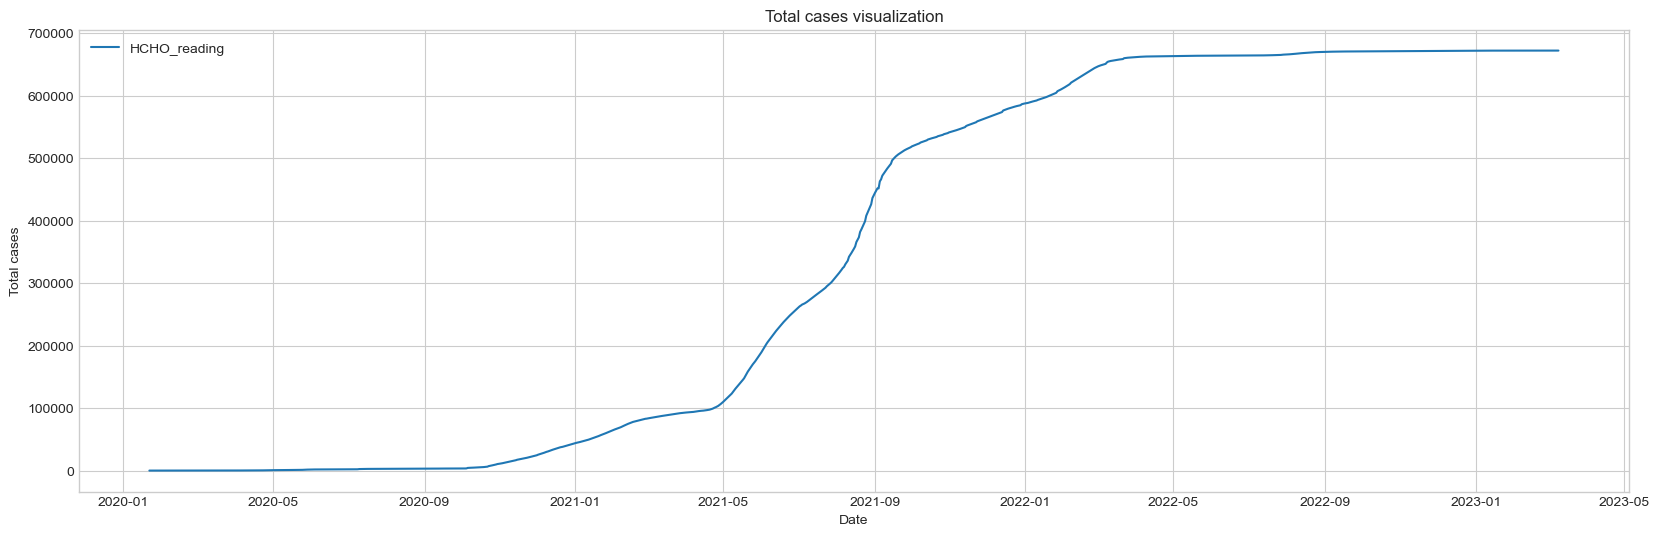

In [70]:
# Create the plot
plt.figure(figsize=(20, 6))
plt.plot( df.index, df["total"], label="HCHO_reading")
plt.title("Total cases visualization")
plt.xlabel("Date")
plt.ylabel("Total cases")
plt.legend()
plt.show()

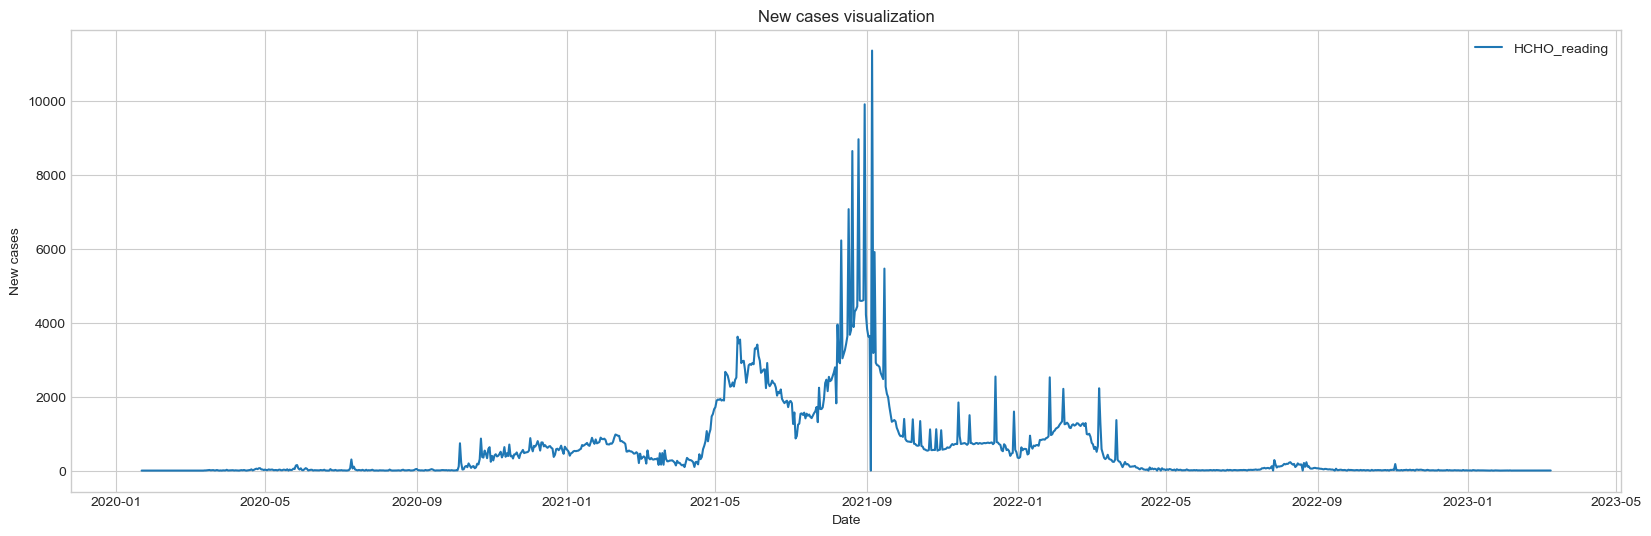

In [71]:
# Create the plot
plt.figure(figsize=(20, 6))
plt.plot( df.index, df["new"], label="HCHO_reading")
plt.title("New cases visualization")
plt.xlabel("Date")
plt.ylabel("New cases")
plt.legend()
plt.show()

In [ ]:
//

In [41]:
import requests

api_url = 'https://api.api-ninjas.com/v1/country?name=Sri Lanka'
response = requests.get(api_url, headers={'X-Api-Key': 'ChFX2bim+4wKPTz29XhdDA==AnPaGTh554GAAJiB'})
if response.status_code == requests.codes.ok:
    print(response.text)
else:
    print("Error:", response.status_code, response.text)

[{"gdp": 88942.0, "sex_ratio": 92.1, "surface_area": 65610.0, "life_expectancy_male": 73.3, "unemployment": 4.2, "imports": 17992.0, "homicide_rate": 2.4, "currency": {"code": "LKR", "name": "Sri Lanka Rupee"}, "iso2": "LK", "employment_services": 45.9, "employment_industry": 30.4, "urban_population_growth": 0.5, "secondary_school_enrollment_female": 102.6, "employment_agriculture": 23.7, "capital": "Colombo", "co2_emissions": 23.1, "forested_area": 33.0, "tourists": 2334.0, "exports": 12589.0, "life_expectancy_female": 80.0, "post_secondary_enrollment_female": 23.4, "post_secondary_enrollment_male": 15.8, "primary_school_enrollment_female": 99.6, "infant_mortality": 7.6, "gdp_growth": 3.2, "threatened_species": 641.0, "population": 21413.0, "urban_population": 18.6, "secondary_school_enrollment_male": 98.0, "name": "Sri Lanka", "pop_growth": 0.5, "region": "Southern Asia", "pop_density": 341.5, "internet_users": 34.1, "gdp_per_capita": 4189.7, "fertility": 2.2, "refugees": 37.6, "prim